# Simple Interest Rate Modeling 
### By Rishabb Suresh, rishabb.suresh@nyu.edu, New York University

In [100]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 5]

### Historical yield curve data for US Treasuries from Quandl for dates - 1990/01/02 to 2019/10/07

In [44]:
dty_df = pd.read_csv("C:/Users/Rishabb/Downloads/USTREASURY-YIELD.csv")

### Understanding the dataframe

In [45]:
dty_df.head()

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
0,2019-10-07,1.76,1.76,1.75,1.73,1.64,1.46,1.41,1.38,1.47,1.56,1.85,2.05
1,2019-10-04,1.73,1.74,1.71,1.65,1.58,1.40,1.35,1.34,1.43,1.52,1.81,2.01
2,2019-10-03,1.78,1.75,1.70,1.66,1.58,1.39,1.34,1.34,1.45,1.54,1.85,2.04
3,2019-10-02,1.75,1.75,1.79,1.75,1.67,1.48,1.43,1.43,1.53,1.60,1.90,2.09
4,2019-10-01,1.79,1.77,1.82,1.81,1.73,1.56,1.51,1.51,1.59,1.65,1.93,2.11


In [46]:
dty_df = dty_df.iloc[::-1]

In [47]:
dty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7448 entries, 7447 to 0
Data columns (total 13 columns):
Date     7448 non-null object
1 MO     4549 non-null float64
2 MO     244 non-null float64
3 MO     7445 non-null float64
6 MO     7448 non-null float64
1 YR     7448 non-null float64
2 YR     7448 non-null float64
3 YR     7448 non-null float64
5 YR     7448 non-null float64
7 YR     7448 non-null float64
10 YR    7448 non-null float64
20 YR    6509 non-null float64
30 YR    6454 non-null float64
dtypes: float64(12), object(1)
memory usage: 756.6+ KB


In [48]:
dty_df.describe()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
count,4549.000000,244.000000,7445.000000,7448.000000,7448.000000,7448.000000,7448.000000,7448.000000,7448.000000,7448.000000,6509.000000,6454.000000
mean,1.293524,2.279877,2.788459,2.921681,3.051203,3.358528,3.579870,3.981803,4.291408,4.530988,4.630770,5.083227
std,1.494726,0.183142,2.290880,2.323276,2.319121,2.332953,2.274286,2.142651,2.040780,1.920480,1.590111,1.842788
min,0.000000,1.740000,0.000000,0.020000,0.080000,0.160000,0.280000,0.560000,0.910000,1.370000,1.690000,1.940000
25%,0.060000,2.160000,0.290000,0.450000,0.600000,0.980000,1.430000,1.930000,2.340000,2.760000,3.020000,3.200000
50%,0.880000,2.360000,2.440000,2.535000,2.695000,3.190000,3.550000,3.950000,4.200000,4.440000,4.740000,4.905000
75%,1.980000,2.430000,5.020000,5.130000,5.180000,5.450000,5.570000,5.790000,5.990000,5.992500,5.870000,6.570000
max,5.270000,2.480000,8.260000,8.490000,8.640000,9.050000,9.110000,9.100000,9.120000,9.090000,8.300000,9.180000


### Visualization of Yields 

Text(0.5,0,'Dates')

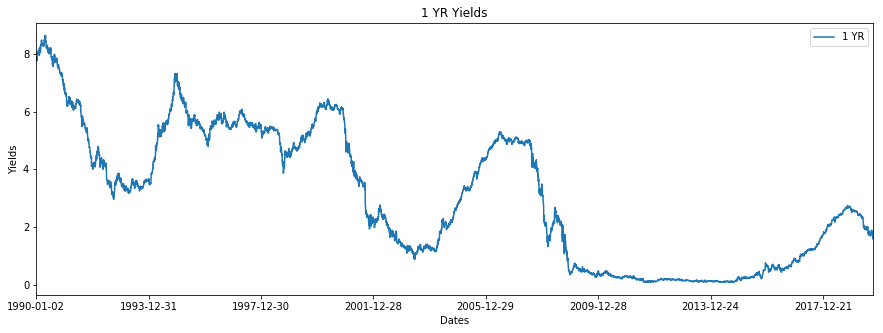

In [101]:
plt.figure(figsize = (15,5))
dty_df.plot(x = 'Date', y = '1 YR',ax = plt.gca())
plt.title("1 YR Yields")
plt.ylabel("Yields")
plt.xlabel("Dates")

Text(0.5,0,'Dates')

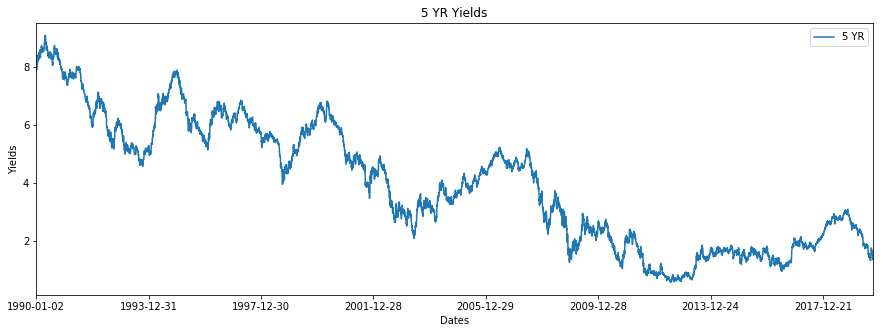

In [50]:
plt.figure(figsize = (15,5))
dty_df.plot(x = 'Date', y = '5 YR',ax = plt.gca())
plt.title("5 YR Yields")
plt.ylabel("Yields")
plt.xlabel("Dates")

Text(0.5,0,'Dates')

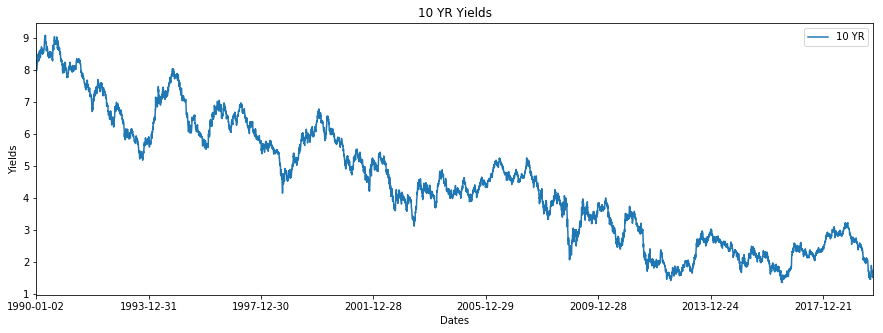

In [51]:
plt.figure(figsize = (15,5))
dty_df.plot(x = 'Date', y = '10 YR',ax = plt.gca())
plt.title("10 YR Yields")
plt.ylabel("Yields")
plt.xlabel("Dates")

Text(0.5,0,'Dates')

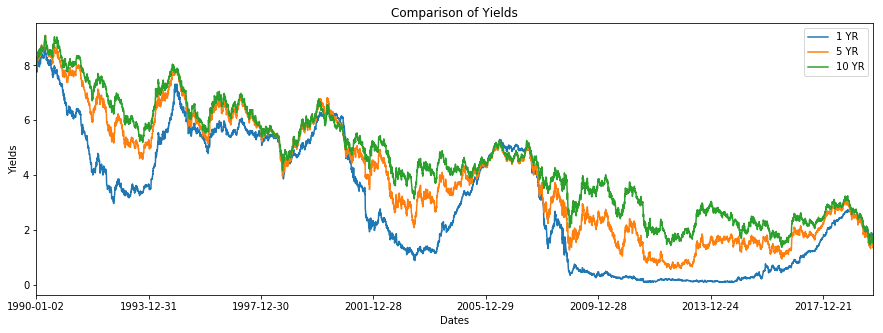

In [52]:
plt.figure(figsize = (15,5))
dty_df.plot(x = 'Date', y = ['1 YR','5 YR','10 YR'],ax = plt.gca())
plt.title("Comparison of Yields")
plt.ylabel("Yields")
plt.xlabel("Dates")

In [93]:
min_yield = dty_df["10 YR"].min()

In [94]:
dty_df.loc[dty_df["10 YR"] == min_yield,"Date"]

815    2016-07-05
812    2016-07-08
Name: Date, dtype: object

<font color=green>
- Assuming you have a debt with an interest rate of 4% and maturity of 10 years. What historical year is the best time for refinancing opportunities? Explain.
<font color=black>
- Answer: Assuming we have a fixed rate corporate bond bearing a coupon of 4% annually and with years to maturity of 10 years, we have two rate risks namely the base treasury rate risk and the corporate spread risk. If we assume the corporate spread risk to be constant over the course of our observations, we see that the 10 year yields reached a historic low of 1.37 p.c during the second week of July 2016. Thus, given the choice, I would refinance the debt at this point to capitalize on the opportunity to pay the lowest fixed rate coupons for the remaining 10 years up till maturity.
 

Date     2019-10-07
1 MO           1.76
2 MO           1.76
3 MO           1.75
6 MO           1.73
1 YR           1.64
2 YR           1.46
3 YR           1.41
5 YR           1.38
7 YR           1.47
10 YR          1.56
20 YR          1.85
30 YR          2.05
Name: 0, dtype: object


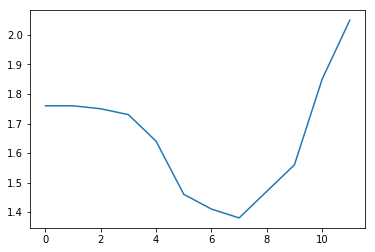

In [55]:
row = dty_df.iloc[7447].values
row = row[1:]
print(dty_df.iloc[7447])
plt.plot(row)
plt.show()

<font color=green>
- Do you notice inverted yield curve? If so, what does it indicate?
<font color=black>
- Answer: From the latest data observed on October 7 2019, we observe a partially inverted yield curve. The barometer pairs of (1-month, 10-year) and (6-month,5-year) are having negative spreads whereas the the 30-year yields are the highest amongst the traded Treasury yields. This implies two things: 
    - There is a great demand for the 2 to 10- year outstanding Treasuries that their yields have been suppressed
    - Also, these Treasuries are less controlled by the Feds and act as a gauge of investors' expectations, including market   sentiment and inflation expectations. The current yields, considering a steady inflation, is indicating that these future yields will be lower implying a plausible recession in the short-term. 

### Simulation of future yield curves

#### Methodology

We are given the Kalotay-William-Fabozzi Model of short term interest rates:

$$
d ln(r_t) = \mu_t*dt + \sigma_t*dW_t
$$
where W is the weiner process

From applying Ito's Lemma to the model equation, we get a solution for r as follows:

$$
r_(t+\delta_t) = r_t * exp((\mu - (\sigma)^2/2)*\delta_t + \sigma * W * sqrt(\delta_t))
$$

Let $$ ln(r_(t+\delta_t)/r_t) = X $$

We also can compute:

$$
\mathbf{E}(X) = \mu_t
$$

We know:

$$
Var(X) = \mathbf{E}(X^2) - \mathbf{E}(X)^2
$$

and

$$
dln(r_t) = ln((r_(t+\delta_t)) - ln(r_t) = ln(r_(t+\delta_t)/r_t) = \mu_t*dt + \sigma_t*dW_t = X
$$

Which implies:

$$
Var(X) = \mathbf{E}((\mu_t*dt + \sigma_t*dW_t)^2) - \mu_t^2 = \sigma_t^2 * \delta_t - \mu_t^2
$$

Therefore:

$$
Var(ln((r_(t+\delta_t)) - ln(r_t)) = \sigma_t^2 * \delta_t - \mu_t^2
$$

#### Computation of log changes in yields

In [56]:
dty_df = dty_df.assign(logr_1yr = np.log(dty_df["1 YR"]) - np.log(dty_df["1 YR"].shift(1)))
dty_df = dty_df.assign(logr_5yr = np.log(dty_df["5 YR"]) - np.log(dty_df["5 YR"].shift(1)))
dty_df = dty_df.assign(logr_10yr = np.log(dty_df["10 YR"]) - np.log(dty_df["10 YR"].shift(1)))

In [57]:
dty_df.head()

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,logr_1yr,logr_5yr,logr_10yr
7447,1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00,NaN,NaN,NaN
7446,1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04,0.005109,0.006333,0.006277
7445,1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04,-0.003829,-0.001263,-0.001252
7444,1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06,-0.003844,0.001263,0.001252
7443,1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09,0.002564,0.000000,0.003748


In [58]:
dty_df1 = dty_df[1:]

#### Finding Expectation of log changes

In [59]:
theta_1yr = dty_df1.logr_1yr.mean()
theta_5yr = dty_df1.logr_5yr.mean()
theta_10yr = dty_df1.logr_10yr.mean()

In [60]:
theta_1yr

-0.00020957549644359905

In [61]:
theta_5yr

-0.00023378200124348045

In [62]:
theta_10yr

-0.00021850778219384949

#### Computing sigma 

In [63]:
stdlog_1yr = dty_df1.logr_1yr.std()
stdlog_5yr = dty_df1.logr_5yr.std()
stdlog_10yr = dty_df1.logr_10yr.std()

In [64]:
varlog_1yr = stdlog_1yr**2
varlog_5yr = stdlog_5yr**2
varlog_10yr = stdlog_10yr**2

In [65]:
varlog_1yr

0.0012558427634432564

In [66]:
varlog_5yr

0.0005732725761786693

In [67]:
varlog_10yr

0.00027022956084357756

In [68]:
sigma_1yr = math.sqrt(varlog_1yr + (theta_1yr**2))
sigma_5yr = math.sqrt(varlog_5yr + (theta_5yr**2))
sigma_10yr = math.sqrt(varlog_10yr + (theta_10yr**2))

In [69]:
sigma_1yr

0.03543849157811272

In [70]:
sigma_5yr

0.02394425255051355

In [71]:
sigma_10yr

0.016440112727547123

#### Setting initial rates for our simulated paths

In [72]:
initial_1yr = dty_df.loc[0,"1 YR"]
initial_5yr = dty_df.loc[0,"5 YR"]
initial_10yr = dty_df.loc[0,"10 YR"]

#### Running a loop to generate multiple paths for our future periods
##### Point to note: we can change number of paths and predicted days depending on our needs 

In [85]:
n_paths = 10
n_pred_days = 1000
pred_1yr = []
for i in range(n_paths):
    path_1yr = []
    for j in range(n_pred_days):
        if (j == 0) :
            init_r = initial_1yr
        brown_var = np.random.normal(0,1,1)
        r_new  = init_r * math.exp((theta_1yr - (sigma_1yr**2/2)) + (sigma_1yr * brown_var))
        path_1yr.append(r_new)
        init_r = r_new
    pred_1yr.append(path_1yr)               

<Figure size 1080x360 with 0 Axes>

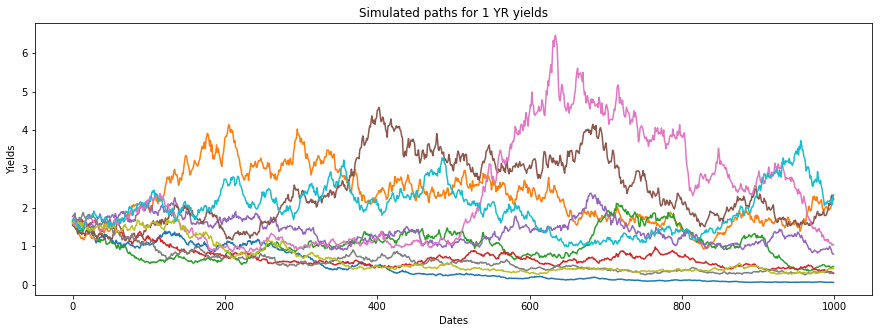

In [102]:
number_day = [i for i in range(0,n_pred_days)]

plt.figure(figsize = (15,5))

fig, ax = plt.subplots(1, 1)
for g in range(len(pred_1yr)):
   ax.plot(number_day, pred_1yr[g])
plt.title("Simulated paths for 1 YR yields")
plt.ylabel("Yields")
plt.xlabel("Dates")
plt.show()

In [89]:
n_paths = 10
n_pred_days = 1000
pred_5yr = []
for i in range(n_paths):
    path_5yr = []
    for j in range(n_pred_days):
        if (j == 0) :
            init_r = initial_5yr
        brown_var = np.random.normal(0,1,1)
        r_new  = init_r * math.exp((theta_5yr - (sigma_5yr**2/2)) + (sigma_5yr * brown_var))
        path_5yr.append(r_new)
        init_r = r_new
    pred_5yr.append(path_5yr)          

<Figure size 1080x360 with 0 Axes>

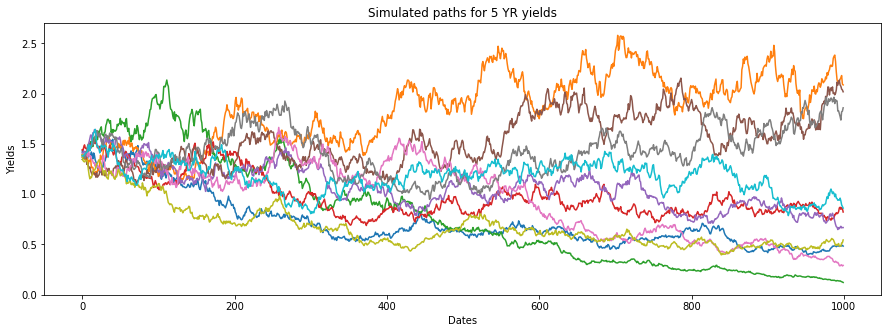

In [103]:
number_day = [i for i in range(0,n_pred_days)]

plt.figure(figsize = (15,5))

fig, ax = plt.subplots(1, 1)
for g in range(len(pred_5yr)):
   ax.plot(number_day, pred_5yr[g])
plt.title("Simulated paths for 5 YR yields")
plt.ylabel("Yields")
plt.xlabel("Dates")
plt.show()

In [91]:
n_paths = 10
n_pred_days = 1000
pred_10yr = []
for i in range(n_paths):
    path_10yr = []
    for j in range(n_pred_days):
        if (j == 0) :
            init_r = initial_10yr
        brown_var = np.random.normal(0,1,1)
        r_new  = init_r * math.exp((theta_10yr - (sigma_10yr**2/2)) + (sigma_10yr * brown_var))
        path_10yr.append(r_new)
        init_r = r_new
    pred_10yr.append(path_10yr)          

<Figure size 1080x360 with 0 Axes>

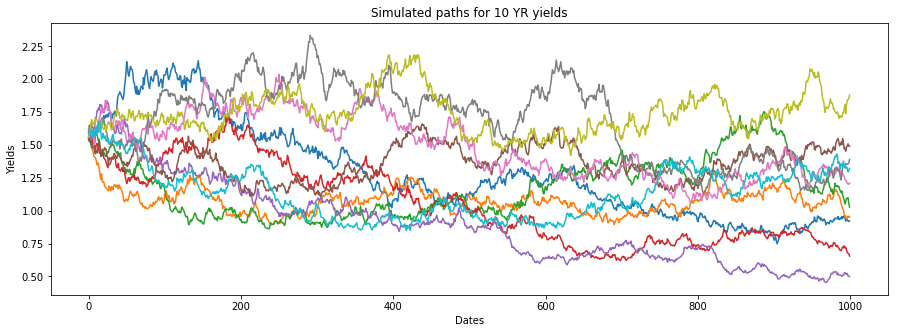

In [104]:
number_day = [i for i in range(0,n_pred_days)]

plt.figure(figsize = (15,5))

fig, ax = plt.subplots(1, 1)
for g in range(len(pred_10yr)):
   ax.plot(number_day, pred_10yr[g])
plt.title("Simulated paths for 10 YR yields")
plt.ylabel("Yields")
plt.xlabel("Dates")
plt.show()

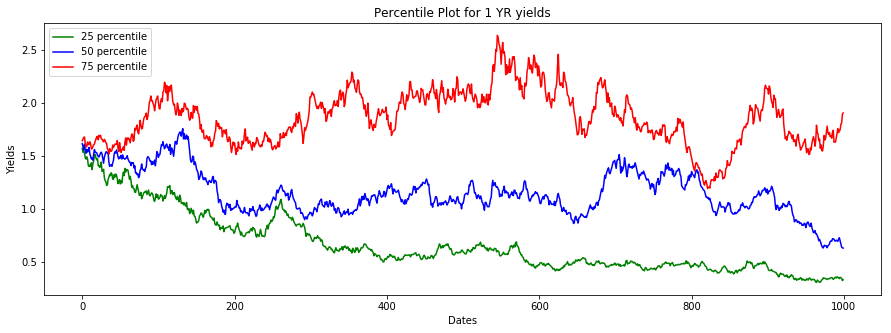

In [123]:
sim_df = pd.DataFrame(pred_1yr)

perc25_1yr = []
perc50_1yr = []
perc75_1yr = []
for t in sim_df.columns:
    perc25_1yr.append(sim_df[t].quantile(0.25))
    perc50_1yr.append(sim_df[t].quantile(0.5))
    perc75_1yr.append(sim_df[t].quantile(0.75))

fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(perc25_1yr,c='g',label='25 percentile')
ax.plot(perc50_1yr,c='b',label='50 percentile',fillstyle='none')
ax.plot(perc75_1yr,c='r',label='75 percentile')

plt.title("Percentile Plot for 1 YR yields")
plt.ylabel("Yields")
plt.xlabel("Dates")

plt.legend(loc=2)
plt.draw()

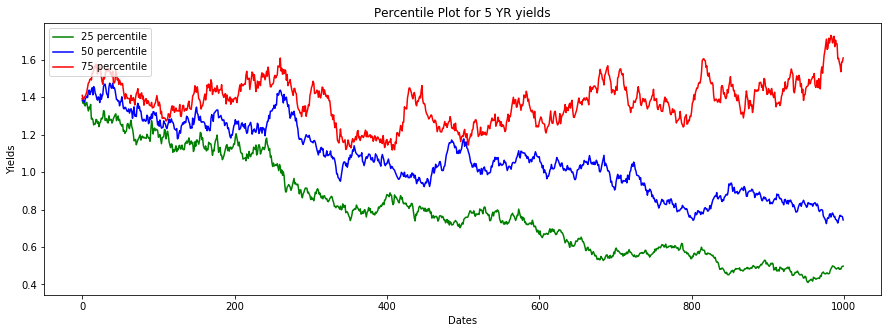

In [121]:
sim_df = pd.DataFrame(pred_5yr)

perc25_5yr = []
perc50_5yr = []
perc75_5yr = []
for t in sim_df.columns:
    perc25_5yr.append(sim_df[t].quantile(0.25))
    perc50_5yr.append(sim_df[t].quantile(0.5))
    perc75_5yr.append(sim_df[t].quantile(0.75))

fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(perc25_5yr,c='g',label='25 percentile')
ax.plot(perc50_5yr,c='b',label='50 percentile',fillstyle='none')
ax.plot(perc75_5yr,c='r',label='75 percentile')

plt.title("Percentile Plot for 5 YR yields")
plt.ylabel("Yields")
plt.xlabel("Dates")

plt.legend(loc=2)
plt.draw()

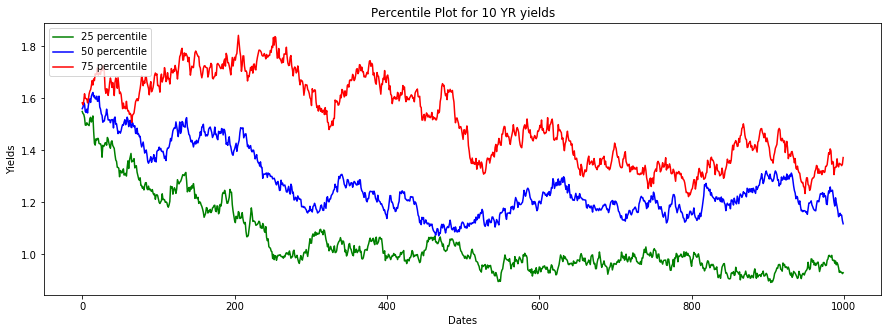

In [124]:
sim_df = pd.DataFrame(pred_10yr)

perc25_10yr = []
perc50_10yr = []
perc75_10yr = []
for t in sim_df.columns:
    perc25_10yr.append(sim_df[t].quantile(0.25))
    perc50_10yr.append(sim_df[t].quantile(0.5))
    perc75_10yr.append(sim_df[t].quantile(0.75))

fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(perc25_10yr,c='g',label='25 percentile')
ax.plot(perc50_10yr,c='b',label='50 percentile',fillstyle='none')
ax.plot(perc75_10yr,c='r',label='75 percentile')

plt.title("Percentile Plot for 10 YR yields")
plt.ylabel("Yields")
plt.xlabel("Dates")


plt.legend(loc=2)
plt.draw()